# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here

import pandas as pd
import numpy as np


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here

employee = pd.read_csv('Employee.csv')


In [36]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [6]:
# Method 1
# your answer here

employee_salary = employee.groupby('Department').agg({'Salary':'mean'})

employee_salary.head()


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [7]:
# Method 2
# your answer here

employee_salary_pivot = pd.pivot_table(employee,values='Salary',index='Department')

employee_salary_pivot.head()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [8]:
# your answer here

employee_pivot_titles = pd.pivot_table(employee,values='Salary',index=['Department','Title'])
employee_pivot_titles

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [9]:
# your answer here

salary_years = pd.pivot_table(employee,values=['Salary','Years'],index='Title')
salary_years.head()

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [49]:
# your answer here

df = employee.pivot_table(index=['Title','Department'], values= ['Salary'], aggfunc=['sum','count'])



df.columns.set_levels([['Total Salary','Number of Employees','Department','Title'],[' ','.']], inplace=True)

df



Total Salary Number of Employees
                                                     
Title     Department                                 
VP        HR                   70                   1
          IT                   70                   1
analyst   HR                   65                   2
          IT                   65                   2
associate IT                   60                   1
          Sales               110                   2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [4]:
# your answer here

df = employee.pivot_table(index=['Title','Department'], values= ['Salary'], aggfunc=['median','min','max','std'])

df

# given that this database is small and only has 1 VP HR, IT and one associate IT, the values for this
# title-department dont give mutch information
# for the rest of it we see that the values are not so different for each department.


median    min    max       std
                     Salary Salary Salary    Salary
Title     Department                               
VP        HR           70.0     70     70       NaN
          IT           70.0     70     70       NaN
analyst   HR           32.5     30     35  3.535534
          IT           32.5     30     35  3.535534
associate IT           60.0     60     60       NaN
          Sales        55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [5]:
# your answer here

df = df.fillna(0)

df


median    min    max       std
                     Salary Salary Salary    Salary
Title     Department                               
VP        HR           70.0     70     70  0.000000
          IT           70.0     70     70  0.000000
analyst   HR           32.5     30     35  3.535534
          IT           32.5     30     35  3.535534
associate IT           60.0     60     60  0.000000
          Sales        55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [6]:
# your answer here

df = employee.pivot_table(index=['Department'], values= ['Salary'], aggfunc=['count','sum'])

df


,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [10]:
# your answer here

df = employee.pivot_table(index=['Title','Department'], values= ['Salary','Years'], aggfunc=['sum','mean'])

df[[( 'sum',  'Years'),('mean', 'Salary')]]

sum   mean
                     Years Salary
Title     Department             
VP        HR             8   70.0
          IT             8   70.0
analyst   HR             6   32.5
          IT             3   32.5
associate IT             7   60.0
          Sales          5   55.0

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [11]:
# your answer here

fitbit = pd.read_csv('Fitbit.csv')


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [13]:
# your answer here

fitbit.describe()


,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [17]:
fitbit['Minutes Very Active'].nunique()

103

In [15]:
# your answer here

fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [18]:
# your answer here

fitbit['Steps'].corr(fitbit['Minutes Very Active'])



0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

<function matplotlib.pyplot.show(close=None, block=None)>

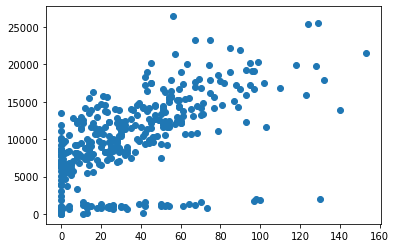

In [19]:
# your answer here

import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.show

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here

# we can see a correlation where the more minutes active the more steps,
# however is interesting to see that are many outliers that have a lot of minutes very active but,
# few steps, this may indicate some error in the system.
# the column that forms with 0 minutes active and steps mus be of ones that dont stay very active but,
# are doing steps, like walking.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [22]:
# your answer here

fitbit['Steps'].corr(fitbit['Minutes Sedentary'])



0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<function matplotlib.pyplot.show(close=None, block=None)>

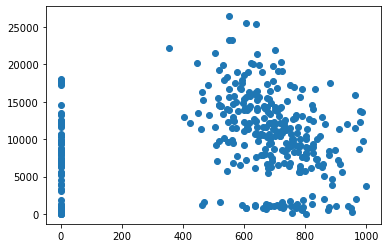

In [23]:
# your answer here

plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.show


# we see that there are a lot of 0 minutes sedentary, and that is also a mistake, because
# it doesnt seem reasonable that people stay active all the time, and if that was the case
# the steps of these people would be higher.
# for the rest of the scatter we can see first that people the users of the app
# are not sedentary for less that 400 minutes
# and that there is a group of results
# that stay sedentary a lot and dont do mutch steps.
# the rest of the results follows a much normal pattern.


#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [24]:
# your answer here

fitbit['Steps'].corr(fitbit['MinutesOfSleep'])


0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<function matplotlib.pyplot.show(close=None, block=None)>

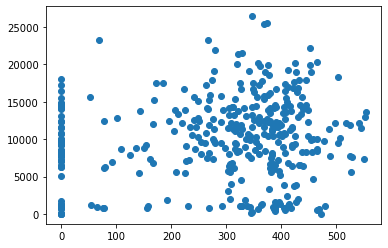

In [25]:
# your answer here

plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.show

# then again we see the '0' group that must be a error or im starting to suspect that the individuals,
# turn off the app at some times and then it doesnt compute the activity on this time
# we see here that the results are more over the place, with no particular group forming.



#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

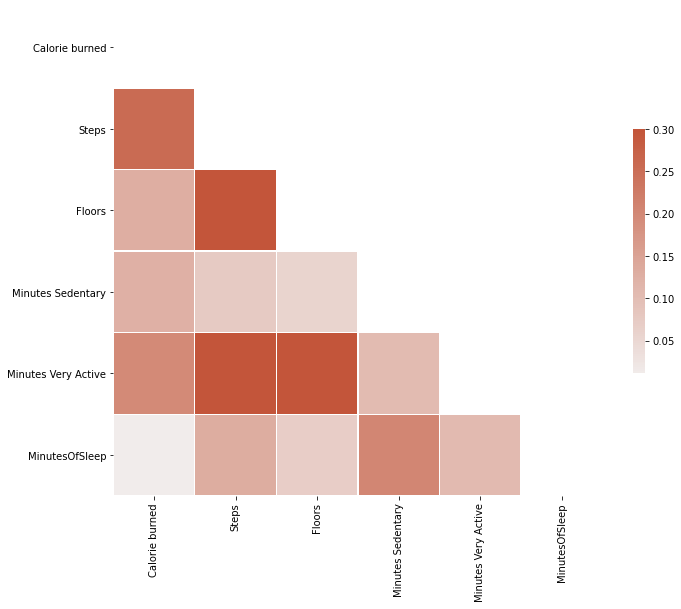

In [29]:
# your answer here

column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

import seaborn as sns
import numpy as np

subdf = fitbit[column]

cor_fit = subdf.corr()

mask = np.triu(np.ones_like(cor_fit, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(cor_fit, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()



#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [31]:
# your answer here

cor_fit.sort_values('Steps', ascending=False)


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [33]:
# your answer here


time_grades = pd.read_csv('Time_Grades.csv')


In [43]:
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

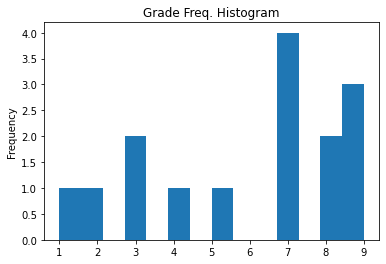

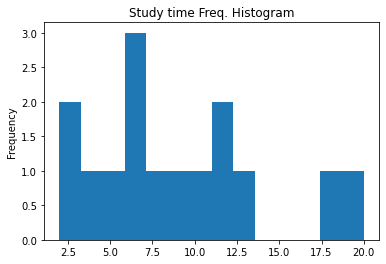

In [47]:
# your answer here



plt.hist(time_grades['Grade'], bins=14)
plt.gca().set(title='Grade Freq. Histogram', ylabel='Frequency')
plt.show()

plt.hist(time_grades['Study time'], bins=14)
plt.gca().set(title='Study time Freq. Histogram', ylabel='Frequency')
plt.show()


#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [50]:
# your answer here

print(time_grades.corr(method='pearson'))
print(time_grades.corr(method='spearman'))


# these variables have a high correlation
# the spearman correlation is slighty higher because it takes in to account the rank of the value compared to the other,
# rather than the raw value.

            Study time     Grade
Study time    1.000000  0.798046
Grade         0.798046  1.000000
            Study time     Grade
Study time    1.000000  0.819659
Grade         0.819659  1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<function matplotlib.pyplot.show(close=None, block=None)>

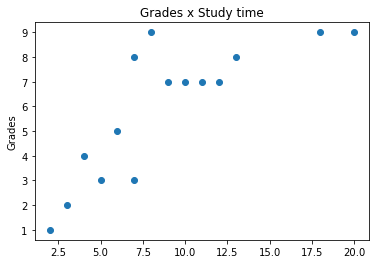

In [53]:
# your answer here

plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.gca().set(title='Grades x Study time', ylabel='Grades')
plt.show

# we can see cleary the correlation, and that the 2 highest values are also the highest study times.



#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [54]:
# your answer here


# Pearson correlation: Pearson correlation evaluates the linear relationship between two continuous variables.

# Spearman correlation: Spearman correlation evaluates the monotonic relationship. 
# The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.